# Introduccion Del Proyecto<br> 
Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.<br><br>
Construir un prototipo de un modelo de aprendizaje automático para la deteccion de estos clientes puede llegar a cancelar los servicios




In [1]:
#Importar librerias 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importar datasets
try:
    Contratos = pd.read_csv('/datasets/final_provider/contract.csv')
    Internet = pd.read_csv('/datasets/final_provider/internet.csv')
    Personal = pd.read_csv('/datasets/final_provider/personal.csv')
    Phone = pd.read_csv('/datasets/final_provider/phone.csv')
except:
    Contratos = pd.read_csv('./datasets/final_provider/final_provider/contract.csv')
    Internet = pd.read_csv('./datasets/final_provider/final_provider/internet.csv')
    Personal = pd.read_csv('./datasets/final_provider/final_provider/personal.csv')
    Phone = pd.read_csv('./datasets/final_provider/final_provider/phone.csv')

# Analisis Exploratorio de Datos

In [3]:
Contratos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [4]:
Contratos

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [5]:
# Cambio de tipo de dato
Contratos['BeginDate'] = pd.to_datetime(Contratos['BeginDate'],errors='coerce')
Contratos['EndDate'] = pd.to_datetime(Contratos['EndDate'], errors='coerce')
Contratos['TotalCharges'] = pd.to_numeric(Contratos['TotalCharges'], errors='coerce')


In [6]:
print(Contratos.isna().sum())

customerID             0
BeginDate              0
EndDate             5174
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
dtype: int64


In [7]:
print(Contratos[Contratos['TotalCharges'].isna()])

      customerID  BeginDate EndDate      Type PaperlessBilling  \
488   4472-LVYGI 2020-02-01     NaT  Two year              Yes   
753   3115-CZMZD 2020-02-01     NaT  Two year               No   
936   5709-LVOEQ 2020-02-01     NaT  Two year               No   
1082  4367-NUYAO 2020-02-01     NaT  Two year               No   
1340  1371-DWPAZ 2020-02-01     NaT  Two year               No   
3331  7644-OMVMY 2020-02-01     NaT  Two year               No   
3826  3213-VVOLG 2020-02-01     NaT  Two year               No   
4380  2520-SGTTA 2020-02-01     NaT  Two year               No   
5218  2923-ARZLG 2020-02-01     NaT  One year              Yes   
6670  4075-WKNIU 2020-02-01     NaT  Two year               No   
6754  2775-SEFEE 2020-02-01     NaT  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges  
488   Bank transfer (automatic)           52.55           NaN  
753                Mailed check           20.25           NaN  
936            

In [8]:
#Trato de valores null
Contratos["TotalCharges"] = Contratos["TotalCharges"].fillna(Contratos['MonthlyCharges'])

In [9]:
print(Contratos.isna().sum())

customerID             0
BeginDate              0
EndDate             5174
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
dtype: int64


In [10]:
print(Contratos.duplicated().any())

False


In [11]:
Contratos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


In [12]:
Contratos

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,NaT,One year,Yes,Mailed check,84.80,1990.50
7039,2234-XADUH,2014-02-01,NaT,One year,Yes,Credit card (automatic),103.20,7362.90
7040,4801-JZAZL,2019-03-01,NaT,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,Yes,Mailed check,74.40,306.60


## Analisis de Internet

In [13]:
Internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [14]:
print(Internet.isna().sum())

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64


In [15]:
print(Internet.duplicated().any())

False


In [16]:
Internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


## Analisis de Personal

In [17]:
Personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [18]:
print(Personal.isna().sum())

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64


In [19]:
print(Personal.duplicated().any())

False


In [20]:
Personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


## Analisis de Phone

In [21]:
Phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [22]:
print(Phone.isna().sum())

customerID       0
MultipleLines    0
dtype: int64


In [23]:
print(Phone.duplicated().any())

False


In [24]:
Phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


## Merge de tablas


In [25]:
# Merge de tabla contratos con internet 
Merge_1 = pd.merge(Contratos,Internet,on='customerID',how='outer')
# Merge de tabla Merge_1 con Personal
Merge_2 = pd.merge(Merge_1,Personal,on='customerID',how='outer')
# Merge de tabla Merge_2 con Phone
Historical = pd.merge(Merge_2,Phone,on='customerID',how='outer')
# Creacion de la columnas Churn rate
Historical['ChurnRate'] = np.where(Historical['EndDate'].isna(),0,1)

In [26]:
Historical.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,ChurnRate
0,0002-ORFBO,2019-05-01,NaT,One year,Yes,Mailed check,65.6,593.30,DSL,No,...,No,Yes,Yes,No,Female,0,Yes,Yes,No,0
1,0003-MKNFE,2019-05-01,NaT,Month-to-month,No,Mailed check,59.9,542.40,DSL,No,...,No,No,No,Yes,Male,0,No,No,Yes,0
2,0004-TLHLJ,2019-09-01,2020-01-01,Month-to-month,Yes,Electronic check,73.9,280.85,Fiber optic,No,...,Yes,No,No,No,Male,0,No,No,No,1
3,0011-IGKFF,2018-12-01,2020-01-01,Month-to-month,Yes,Electronic check,98.0,1237.85,Fiber optic,No,...,Yes,No,Yes,Yes,Male,1,Yes,No,No,1
4,0013-EXCHZ,2019-09-01,2019-12-01,Month-to-month,Yes,Mailed check,83.9,267.40,Fiber optic,No,...,No,Yes,Yes,No,Female,1,Yes,No,No,1


In [27]:
print(Historical.isna().sum())

customerID             0
BeginDate              0
EndDate             5174
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines        682
ChurnRate              0
dtype: int64


In [28]:
Historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   InternetService   5517 non-null   object        
 9   OnlineSecurity    5517 non-null   object        
 10  OnlineBackup      5517 non-null   object        
 11  DeviceProtection  5517 non-null   object        
 12  TechSupport       5517 non-null   object        
 13  StreamingTV       5517 non-null   object        
 14  StreamingMovies   5517 n

## Visualizacion de datos 

In [29]:
# Creacion de un dataframe aparte, para modificar los datos para genera visualizaciones
df_grafica = Historical.copy()

In [30]:
print(f"Existen {df_grafica[df_grafica['EndDate'].isna()].shape[0]} clientes que siguien con el servicio")
print(f"Existen {df_grafica[~df_grafica['EndDate'].isna()].shape[0]} clientes que han terminado con el servicio")

df_grafica_EndDate = df_grafica[~df_grafica['EndDate'].isna()]
df_grafica_EndDate = df_grafica_EndDate.copy()

Existen 5174 clientes que siguien con el servicio
Existen 1869 clientes que han terminado con el servicio


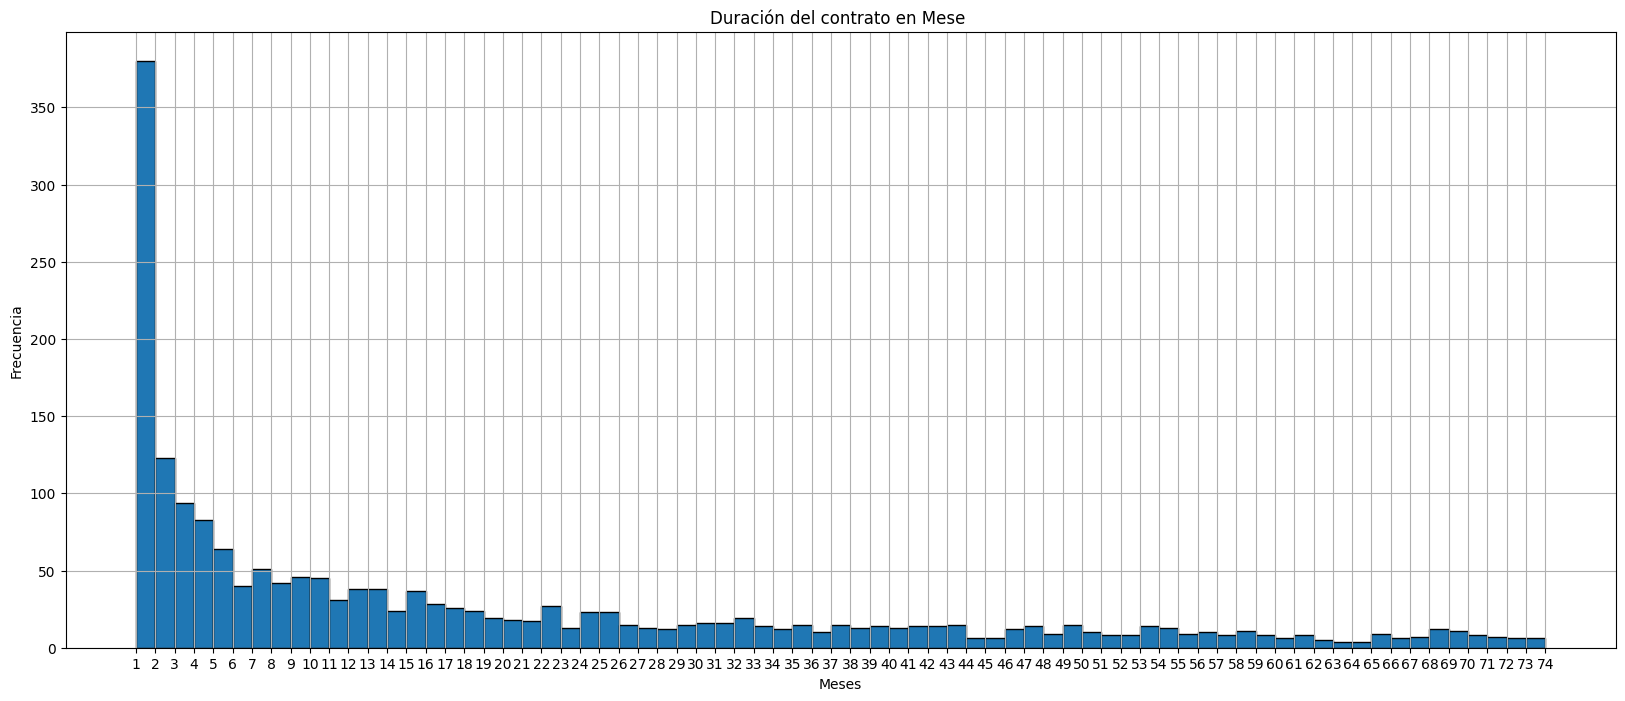

In [31]:
#Filtracion de datos que requerimos
df_grafica_EndDate['Duration'] = (df_grafica_EndDate['EndDate'] - df_grafica_EndDate['BeginDate']).dt.days
df_grafica_EndDate['Duration_months'] = df_grafica_EndDate['Duration'] // 30 
#Creacionn de grafica para visualizar el tiempo del contrato ante finalizar
plt.figure(figsize=(20, 8))

# Crear el histograma
plt.hist(df_grafica_EndDate['Duration_months'], bins=range(1, df_grafica_EndDate['Duration_months'].max() + 2), edgecolor='black')

plt.title('Duración del contrato en Mese ')
plt.xlabel('Meses')
plt.ylabel('Frecuencia')
plt.xticks(range(1, df_grafica_EndDate['Duration_months'].max() + 2))


plt.grid(True)
plt.show()


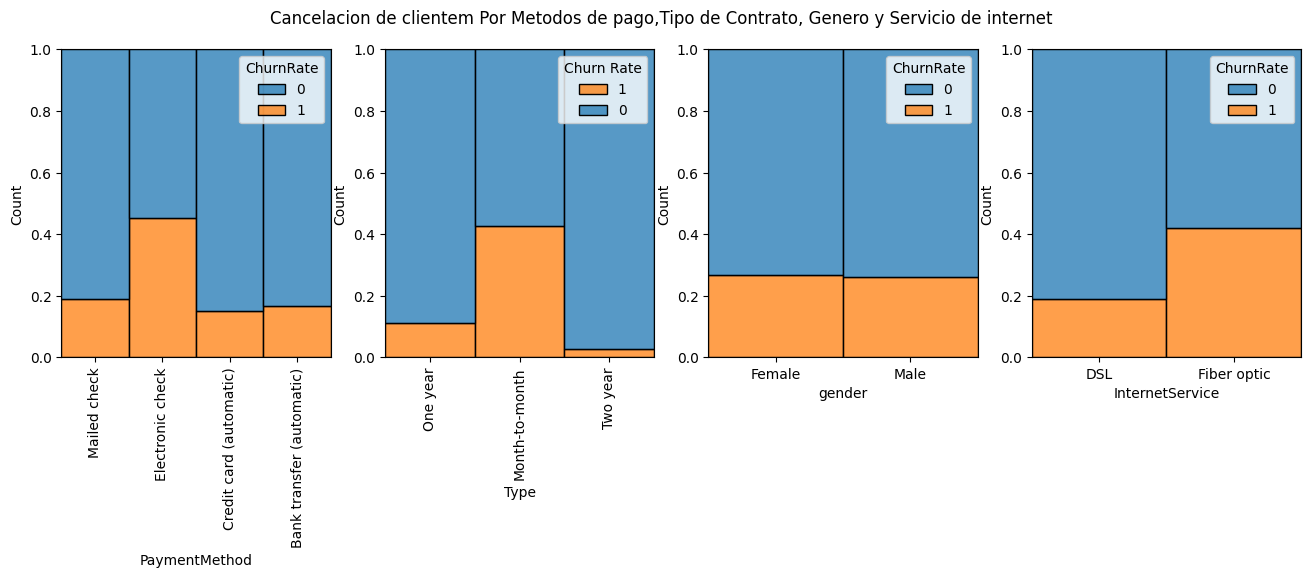

In [45]:
# Generar histogramas con diferentes propositos para analisar la cancelacion de los clientes
# De terminar el numero de graficas
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(16, 4))
# Graficar histogramas
sns.histplot(data=df_grafica, x="PaymentMethod", hue="ChurnRate", multiple="fill",ax=ax0)
sns.histplot(data=df_grafica, x="Type", hue="ChurnRate", multiple="fill", ax=ax1)
sns.histplot(data=df_grafica, x="gender", hue="ChurnRate", multiple="fill", ax=ax2)
sns.histplot(data=df_grafica, x="InternetService", hue="ChurnRate", multiple="fill", ax=ax3)
# Rotacion de los etiquetas
ax0.set_xticklabels(ax0.get_xticklabels(), rotation= 90)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation= 90)
ax1.legend([1,0],loc='upper right', title='Churn Rate')
fig.suptitle("Cancelacion de clientem Por Metodos de pago,Tipo de Contrato, Genero y Servicio de internet")


plt.show()

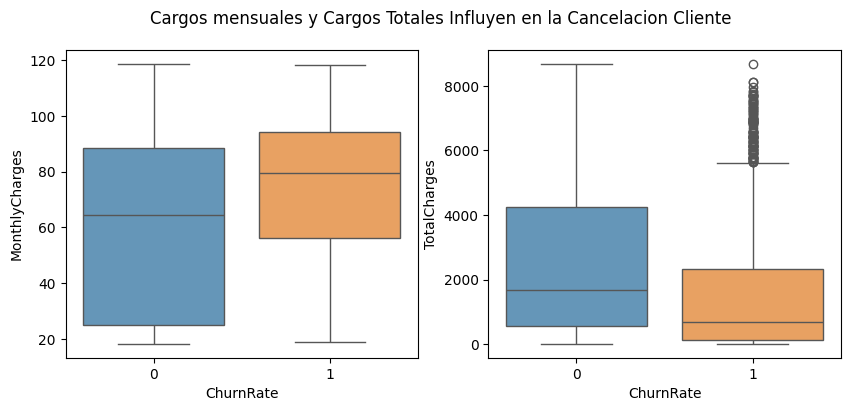

In [60]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4))
custom_palette = {'0': (87/255, 153/255, 198/255), '1': (255/255, 159/255, 75/255)}
sns.boxplot(data=df_grafica, x="ChurnRate", y="MonthlyCharges", ax=ax0,palette=custom_palette)
sns.boxplot(data=df_grafica, x="ChurnRate", y="TotalCharges", ax=ax1,palette=custom_palette)
fig.suptitle("Cargos mensuales y Cargos Totales Influyen en la Cancelacion Cliente")
fig.show()

# Plan de Trabajo
## Preguntas Aclaratorios 
1.¿Podemos considerar que si en la columna "endDate" hay una fecha, significa que el cliente ha dejado nuestro servicio?<br>
## Plan para resolver la tarea 
1. Realizar un merge de las tablas<br><br>
El proposito del merge es juntar todo los datos en uno para tener la mayor cantidad de caracteristicas para llegar a entrenar un modelo de clasificacion<br>
Esta tabla historica que vamos a genera con todo los datos, nos puede servir para poder ver toda la informacion de nuestros clientes<br><br>
2. Limpieza de Datos <br><br>
Asegurar que los datos  esten limpios y listo para generar nuestro Analisis<br><br>  
3. Analisis Exploratorio de Datos<br><br>
Realizar un análisis visual de los datos para identificar patrones, tendencias y relaciones de nuestros clientes<br>
Para la generacion de conclusion de como actuan nuestro clientes<br><br>
4. Procesamiento de datos <br><br>
Para que los datos estén en un formato adecuado y optimizado para el algoritmo de aprendizaje automático que se utilizará<br>
Como la creacion de la columna para identificar los clientes que siguien usan los servicio y los cuales no, seria nuestra columna objectiva<br><br>
5. Entrenamietno de modelo<br><br>
Entrenamiento y Evaluación de Algoritmos de Aprendizaje Automático para medir su rendimiento<br><br>
6. Generación de Informes y Conclusiones<br><br>
Resumir y comunicar los hallazgos del análisis<br><br>

